## 1.电影分类
我们首先使用电影分类讲解K-近邻算法的基本概念，然后学习如何在其他系统上使用K-近邻算法。

### 1.1 导入数据

In [12]:
import numpy as np
import operator

def createDataSet():
    # 4个样本数据
    group = np.array([[1.0,1.1],
                     [1.0,1.0],
                     [0,0],
                     [0,0.1]])
    # 对应4个分类标签
    labels = ['A','A','B','B']
    return group, labels

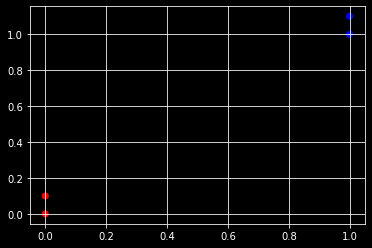

In [24]:
import matplotlib.pyplot as plt

data = [[1.0,1.0,0,0],[1.1,1.0,0,0.1]]
fig, ax = plt.subplots()

ax.scatter(data[0], data[1],c=['blue','blue','red','red'])
ax.grid(which='both',axis='both')

plt.show()

### 1.2 实施简单KNN分类算法
伪代码如下：

对未知类别的数据集中的每个点执行以下操作：

1. 计算已知类别的数据集中的点到当前点的距离

2. 按照距离递增次序排序

3. 选取与当前点距离最小的K个点

4. 确定前K个点的类别出现频率

5. 返回这K个点中出现频率最高的类别作为当前点的预测类别

In [14]:
def classify0(inX, dataSet, labels, k):
    # 数据行数
    dataSetSize = dataSet.shap[0]
    # 复制数据行数的inX 相减
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    # 相减后平方
    sqDiffMat = diffMat ** 2
    # 按行求和
    sqDistance = np.sum(sqDiffMat,axis=1)
    # 开方
    distance = sqDistance ** 0.5
    # 生成排序后的索引值
    sortedDistIndicies = distance.argsort()
    classCount = {}
    # 距离最近的前K个数据点分类出现频次统计
    for i in range(k):
        voteLabel = labels[sortedDistIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel,0) + 1
    sortedClassCount = sorted(classCount, key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

# TODO: 1.加入参数，指定距离算法 